In [2]:
import numpy as np
from numpy import log, exp #Frequently used math function
#from my_function import *
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline,interp1d

import matplotlib.pyplot as plt



#%matplotlib widget

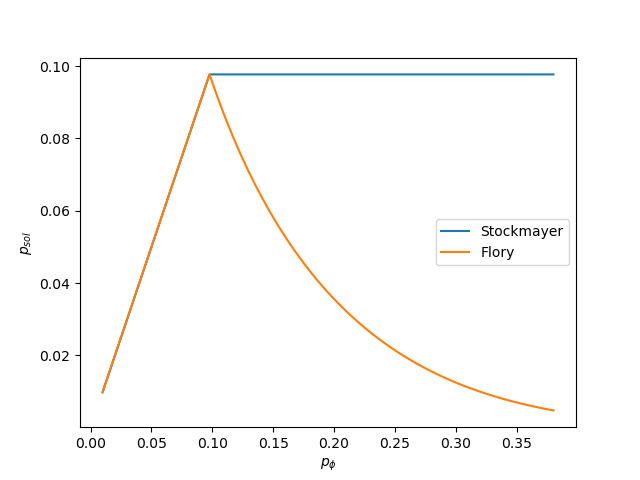

In [32]:
#Flory vs Stockmayer


K_c=np.arange(0.01,1,0.01)  #Using np.arange will cause an error when K_c=0
fig, ax=plt.subplots()
ax.plot([p_sol(k_c) for k_c in K_c],[p_sol(k_c,p_sol(0.12),Type="Stockmayer") for k_c in K_c],label="Stockmayer")
ax.plot([p_sol(k_c) for k_c in K_c],[p_sol(k_c,p_sol(0.12),Type="Flory") for k_c in K_c],label="Flory")
ax.set_xlabel('$p_\phi$')  # Add an x-label to the axes.
ax.set_ylabel('$p_{sol}$')  # Add a y-label to the axes.
ax.legend();  # Add a legend.
plt.show()

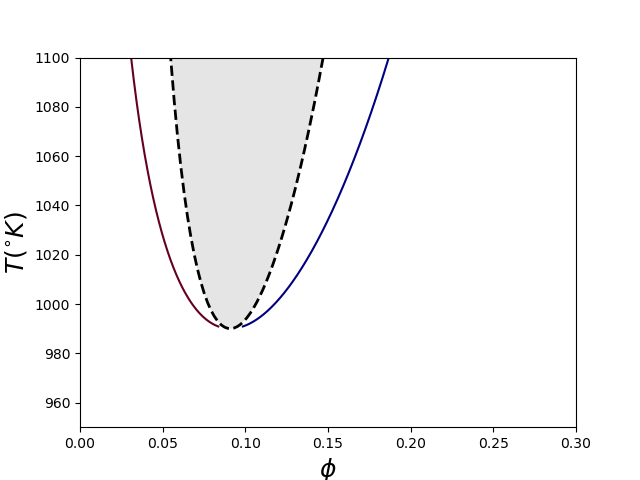

In [3]:
rich,poor,t=np.load("rich_poor_t_LCST_Binodal.npy",allow_pickle=True)
s,T=np.load("phi_t_LCST_Spinodal.npy",allow_pickle=True)

fig, ax = plt.subplots()
ax.plot(rich,t,color='#000080')
ax.plot(poor,t,color='#650021')
#ax.fill_between(y,x1,x2)

ax.plot(s,T,linestyle='dashed',linewidth=2,color='black')
ax.fill_between(s,T,1110,facecolor='grey', alpha=0.2)


ax.set_xlim([0,0.3])
ax.set_ylim([950,1100])
ax.set_xlabel('$\phi$',fontsize=18)  
ax.set_ylabel('$T(^{\circ}K)$',fontsize=18)
#plt.savefig('LCST.eps', format='eps')
plt.show()

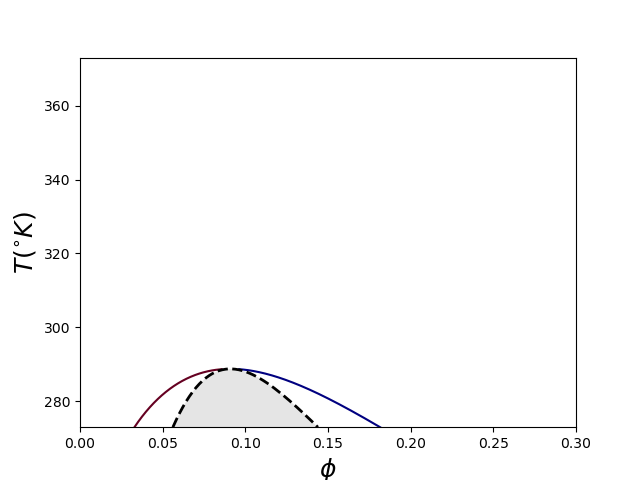

In [187]:
fig, ax = plt.subplots()

rich,poor,t=np.load("rich_poor_t_Binodal_θ_210.npy",allow_pickle=True)
ax.plot(rich,t,color='#000080')
ax.plot(poor,t,color='#650021')
#ax.fill_between(y,x1,x2)

s,T=np.load("phi_t_Spinodal_θ_210.npy",allow_pickle=True)
ax.plot(s,T,linestyle='dashed',linewidth=2,color='black')
ax.fill_between(s,T,273,facecolor='grey', alpha=0.2)

#φ_th,T = np.load("gelation_θ_210_λ0_0.6.npy",allow_pickle=True)
#ax.plot(φ_th[280::],T[280::],linestyle='dotted',linewidth=5,color='#D1B26F')

ax.set_xlim([0,0.3])
ax.set_ylim([273,373])
ax.set_xlabel('$\phi$',fontsize=18)  
ax.set_ylabel('$T(^{\circ}K)$',fontsize=18)
#plt.savefig('LCST.eps', format='eps')
plt.show()

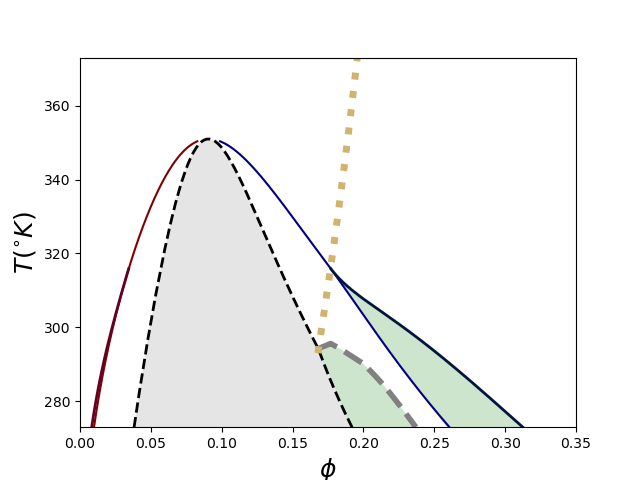

In [6]:
#plt.clf() # To prevent the consumption of memeory
#To fit curve of Sotckmayer, in order for fill in region
def fit(t,a,b):
    return a*t+b
fig, ax = plt.subplots()

#Binodal
rich1,poor1,T1=np.load("rich_poor_t_Binodal_θ_210_λ0_0.377_Stockmayer.npy",allow_pickle=True)
ax.plot(rich1,T1,color='#000080')
ax.plot(poor1,T1,color='#800000')

rich2,poor2,T2=np.load("rich_poor_t_Binodal_θ_210_λ0_0.377_Flory.npy",allow_pickle=True)
ax.plot(rich2[np.where(T2<316)],T2[np.where(T2<316)],color='#01153E',linewidth=2)
ax.plot(poor2[np.where(T2<316)],T2[np.where(T2<316)],color='#650021',linewidth=2)
# curve fit
popt, _ = curve_fit(fit, T1[np.where(rich1>0.177)], rich1[np.where(rich1>0.177)])
a, b = popt
short_rich1=fit(T2[np.where(rich2>0.177)],a,b)
short_rich2=rich2[np.where(rich2>0.177)]
T3=T2[np.where(rich2>0.177)]



#Spinodal
s1,T1=np.load("phi_t_Spinodal_θ_210_λ0_0.377_Stockmayer.npy",allow_pickle=True)
ax.plot(s1,T1,linestyle='dashed',linewidth=2,color='black')
s2,T2=np.load("phi_t_Spinodal_θ_210_λ0_0.377_Flory.npy",allow_pickle=True)
ax.plot(s2[np.where(s2>0.168)],T2[np.where(s2>0.168)],linestyle='dashed',linewidth=4,color='#808080')
# curve fit
popt, _ = curve_fit(fit, T1[np.where(s1>0.168)], s1[np.where(s1>0.168)])
a, b = popt
short_s1=fit(T2[np.where(s2>0.168)],a,b)
short_s2=s2[np.where(s2>0.168)]
T4=T2[np.where(s2>0.168)]


#If there are multiple branches
#s2,T2=np.load("phi_t_Spinodal_θ_210_Stockmayer_branch_2.npy",allow_pickle=True)
#ax.plot(s2,T2,linestyle='dashed',linewidth=2,color='black')




opt, _ = curve_fit(fit, T1[np.where(s1>0.168)], s1[np.where(s1>0.168)])
a, b = popt

ax.fill_between(s1,T1,273,facecolor='grey', alpha=0.2)
ax.fill_betweenx(T3, short_rich1, short_rich2, where = short_rich2 >short_rich1, facecolor ='green', alpha = 0.2)
ax.fill_betweenx(T4, short_s1, short_s2, where = short_s2 >short_s1, facecolor ='green', alpha = 0.2)


#Gelation
φ_th,T = np.load("gelation_θ_210_λ0_0.377.npy",allow_pickle=True)
ax.plot(φ_th[np.where(T>293)],T[np.where(T>293)],linestyle='dotted',linewidth=5,color='#D1B26F')

ax.set_xlim([0,0.35])
ax.set_ylim([273,373])
ax.set_xlabel('$\phi$',fontsize=18)  
ax.set_ylabel('$T(^{\circ}K)$',fontsize=18)
#plt.savefig('LCST.eps', format='eps')
plt.show()

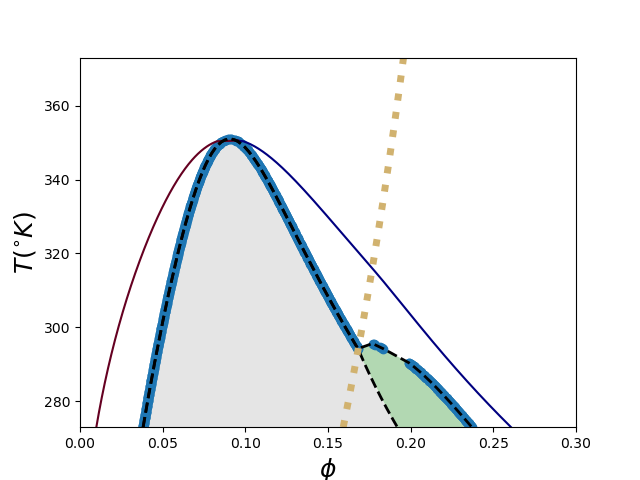

In [74]:
#Eraser 1
x,y=np.load("phi_t_Spinodal_θ_210_λ0_0.377_Flory_Origin.npy",allow_pickle=True)
#plt.plot(x,y)

index=[]
for i in range(0,len(x)):
  if (x[i]<0.175) :
        index.append(i)
e1=np.delete(x,index)
e2=np.delete(y,index)
index=[]
for i in range(0,len(e1)):
  if (e1[i]>0.185 and e1[i]<0.1985) and (e2[i]>290):
        index.append(i)

e1=np.delete(e1,index)
e2=np.delete(e2,index)
#plt.scatter(e1,e2)

s,T=np.load("phi_t_Spinodal_θ_210_λ0_0.377_Stockmayer.npy",allow_pickle=True)
index=[]
for i in range(0,len(s)):
  if (s[i]>0.1683):
        index.append(i)
es=np.delete(s,index)
eT=np.delete(T,index)

f1=np.hstack((es,e1))
f2=np.hstack((eT,e2))
plt.scatter(f1,f2)
np.save(f"phi_t_Spinodal_θ_210_λ0_0.377_Flory.npy",[f1,f2])
plt.show()

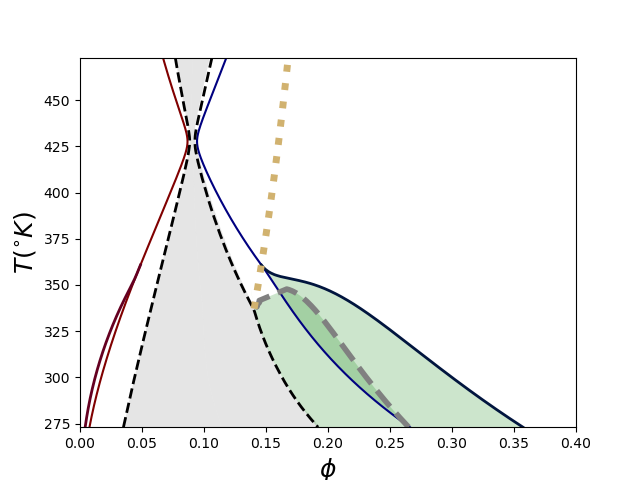

In [7]:
#plt.clf() # To prevent the consumption of memeory
#To fit curve of Sotckmayer, in order for fill in region
def fit(t,a,b,c):
    return a*t**2+b*t+c
fig, ax = plt.subplots()

#Binodal
rich1,poor1,T1=np.load("rich_poor_t_Binodal_θ_210_λ0_0.495_Stockmayer.npy",allow_pickle=True)
ax.plot(rich1,T1,color='#000080')
ax.plot(poor1,T1,color='#800000')

rich2,poor2,T2=np.load("rich_poor_t_Binodal_θ_210_λ0_0.495_Flory.npy",allow_pickle=True)
ax.plot(rich2[np.where(T2<361)],T2[np.where(T2<361)],color='#01153E',linewidth=2)
ax.plot(poor2[np.where(T2<361)],T2[np.where(T2<361)],color='#650021',linewidth=2)
# curve fit
popt, _ = curve_fit(fit, T1[np.where(rich1>0.147)], rich1[np.where(rich1>0.147)])
a, b, c = popt
short_rich1=fit(T2[np.where(rich2>0.147)],a,b,c)
short_rich2=rich2[np.where(rich2>0.147)]
T3=T2[np.where(rich2>0.147)]



#Spinodal
s_b_1,T_b_1=np.load("phi_t_Spinodal_θ_210_λ0_0.495_Stockmayer_branch_1.npy",allow_pickle=True)
ax.plot(s_b_1,T_b_1,linestyle='dashed',linewidth=2,color='black')
s_b_2,T_b_2=np.load("phi_t_Spinodal_θ_210_λ0_0.495_Stockmayer_branch_2.npy",allow_pickle=True)
ax.plot(s_b_2,T_b_2,linestyle='dashed',linewidth=2,color='black')

s_F_b_2,T_F_b_2=np.load("phi_t_Spinodal_θ_210_λ0_0.495_Flory_branch_2.npy",allow_pickle=True)
ax.plot(s_F_b_2[np.where(s_F_b_2>0.141)],T_F_b_2[np.where(s_F_b_2>0.141)],linestyle='dashed',linewidth=4,color='#808080')
# curve fit
popt, _ = curve_fit(fit, T_b_2[np.where(s_b_2>0.141)], s_b_2[np.where(s_b_2>0.141)])
a, b, c = popt
short_s1=fit(T_F_b_2[np.where(s_F_b_2>0.141)],a,b,c)
short_s2=s_F_b_2[np.where(s_F_b_2>0.141)]
T4=T_F_b_2[np.where(s_F_b_2>0.141)]


#If there are multiple branches


medium=(s_b_1+s_b_2[14::][::-1])/2


ax.fill_betweenx(T_b_1,s_b_1,medium,where = medium >s_b_1,facecolor='grey', alpha=0.2)
ax.fill_betweenx(T_b_1,s_b_2[14::][::-1],medium,where = medium <s_b_2[14::][::-1],facecolor='grey', alpha=0.2)
ax.fill_betweenx(T3, short_rich1, short_rich2, where = short_rich2 >short_rich1, facecolor ='green', alpha = 0.2)
ax.fill_betweenx(T4, short_s1, short_s2, where = short_s2 >short_s1, facecolor ='green', alpha = 0.2)


#Gelation
φ_th,T = np.load("gelation_θ_210_λ0_0.495.npy",allow_pickle=True)
ax.plot(φ_th[np.where(T>337)],T[np.where(T>337)],linestyle='dotted',linewidth=5,color='#D1B26F')

ax.set_xlim([0,0.4])
ax.set_ylim([273,473])
ax.set_xlabel('$\phi$',fontsize=18)  
ax.set_ylabel('$T(^{\circ}K)$',fontsize=18)
#plt.savefig('LCST.eps', format='eps')
plt.show()

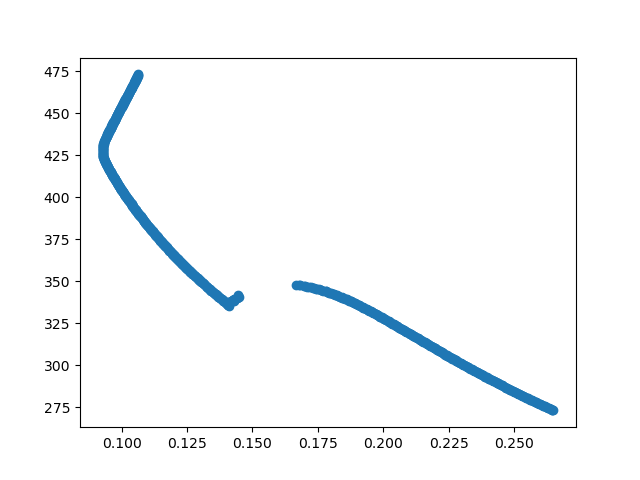

In [171]:
#Eraser 2
plt.clf()


x,y=np.load("phi_t_Spinodal_θ_210_λ0_0.495_Flory_Origin.npy",allow_pickle=True)
#plt.plot(x,y)

index=[]
for i in range(0,len(x)):
  if (x[i]>0.141 and x[i]<0.165) and (y[i]>350):
        index.append(i)
e1=np.delete(x,index)
e2=np.delete(y,index)

index=[]
for i in range(0,len(e1)):
  if (e1[i]<0.166 and e1[i]>0.145):
        index.append(i)

e1=np.delete(e1,index)
e2=np.delete(e2,index)
#plt.plot(e1,e2)


s,T=np.load("phi_t_Spinodal_θ_210_λ0_0.495_Stockmayer_branch_2.npy",allow_pickle=True)
index=[]
for i in range(0,len(s)):
  if (s[i]>0.141):
        index.append(i)
es=np.delete(s,index)
eT=np.delete(T,index)

f1=np.hstack((es,e1))
f2=np.hstack((eT,e2))
plt.scatter(f1,f2)
np.save(f"phi_t_Spinodal_θ_210_λ0_0.495_Flory_branch_2.npy",[f1,f2])
plt.show()

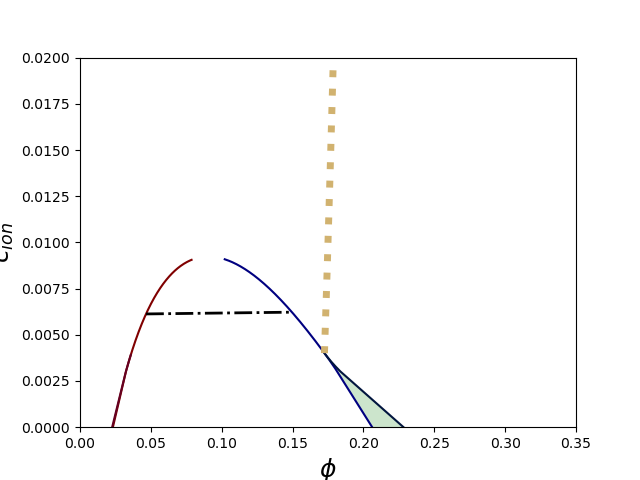

In [218]:
fig, ax = plt.subplots()



#Binodal
phi_rich1,c_rich1,phi_poor1,c_poor1=np.load("phi_rich_c_rich_phi_poor_c_poor_Binodal_θ_210_λ0_0.377_Stockmayer.npy",allow_pickle=True)
ax.plot(phi_rich1[0:380],c_rich1[0:380],color='#000080')
ax.plot(phi_poor1[0:380],c_poor1[0:380],color='#800000')

phi_rich2,c_rich2,phi_poor2,c_poor2=np.load("phi_rich_c_rich_phi_poor_c_poor_Binodal_θ_210_λ0_0.377_Flory.npy",allow_pickle=True)
ax.plot(phi_rich2[np.where(c_rich2<0.004)],c_rich2[np.where(c_rich2<0.004)],color='#01153E')
ax.plot(phi_poor2[np.where(c_rich2<0.004)],c_poor2[np.where(c_rich2<0.004)],color='#650021')


ax.fill_betweenx(c_rich2[np.where(c_rich2<0.004)],phi_rich2[np.where(c_rich2<0.004)],phi_rich1[np.where(c_rich2<0.004)],
                 where = phi_rich2[np.where(c_rich2<0.004)] >phi_rich1[np.where(c_rich2<0.004)],facecolor='green', alpha=0.2)


#Gelation line
phi_th,c_i=np.load("φ_ci_gelation_θ_210_λ0_0.377.npy",allow_pickle=True)
ax.plot(phi_th[np.where(c_i>0.004)],c_i[np.where(c_i>0.004)],linestyle='dotted',linewidth=5,color='#D1B26F')
#tie line
ax.plot([phi_poor1[200],phi_rich1[200]],[c_poor1[200],c_rich1[200]],linestyle='dashdot',linewidth=2,color='black')


ax.set_xlim([0,0.35])
ax.set_ylim([0,0.02])
ax.set_xlabel('$\phi$',fontsize=18)  
ax.set_ylabel('$c_{ion}$',fontsize=18)

plt.show()

Plots for APS

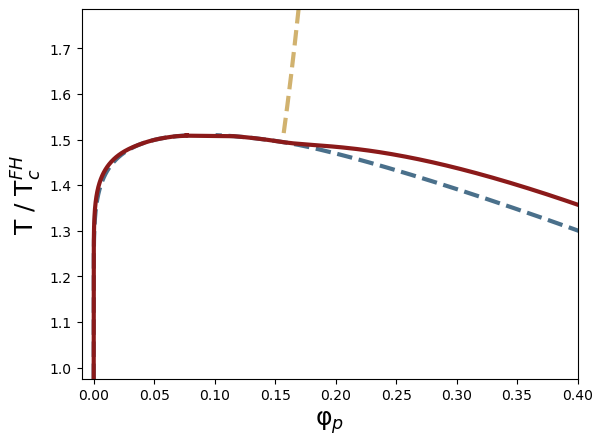

In [53]:
#Binodal curves
rich,poor,TFH=np.load("rich_poor_t_UCST_Binodal_Tc_280.npy",allow_pickle=True)
richS,poorS,TS=np.load("rich_poor_t_Binodal_Tc_280_θp_210_λ0_0.040_Stockmayer.npy",allow_pickle=True)
richF,poorF,TF=np.load("rich_poor_t_Binodal_Tc_280_θp_210_λ0_0.040_Flory.npy",allow_pickle=True)
#Gelation
φ_th,Tg = np.load("gelation_θp_210_λ0_0.040.npy",allow_pickle=True)

Tc=280

fig, ax = plt.subplots()
#UCST
#ax.plot(rich[np.where(TFH<280)],TFH[np.where(TFH<280)]/Tc,linewidth=3,color='black')
#ax.plot(poor[np.where(TFH<280)],t[np.where(TFH<280)]/Tc,linewidth=3,color='black')
#Binodal curves Stockmayer and Flory
ax.plot(richS[np.where(TS<423)],TS[np.where(TS<423)]/Tc,color='#4A708B',linewidth=3,linestyle='dashed')
ax.plot(poorS[np.where(TS<423)],TS[np.where(TS<423)]/Tc,color='#4A708B',linewidth=3,linestyle='dashed')
ax.plot(richF[np.where(TF<423)],TF[np.where(TF<423)]/Tc,color='#8B1A1A',linewidth=3)
ax.plot(poorF[np.where(TF<423)],TF[np.where(TF<423)]/Tc,color='#8B1A1A',linewidth=3)
#Gelation
ax.plot(φ_th[np.where(Tg>424)],Tg[np.where(Tg>424)]/Tc,linestyle='dashed',linewidth=3,color='#D1B26F')

ax.set_xlim([-0.01,0.4])
ax.set_ylim([273/Tc,500/Tc])
ax.set_xlabel('φ$_p$',fontsize=18)  
ax.set_ylabel(r'T / T$^{FH}_c$',fontsize=18)
#plt.savefig('PD_λ0_0.040_Tc_422.76.eps', format='eps')
plt.show()

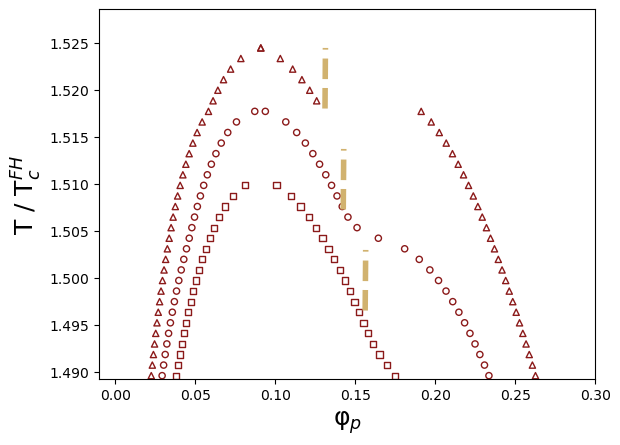

In [3]:
richF1,poorF1,TF=np.load("rich_poor_t_Binodal_Tc_280_θp_210_λ0_0.048_Flory.npy",allow_pickle=True)
φ_th1,Tg = np.load("gelation_θp_210_λ0_0.048.npy",allow_pickle=True)

richF2,poorF2,TF=np.load("rich_poor_t_Binodal_Tc_280_θp_210_λ0_0.044_Flory.npy",allow_pickle=True)
φ_th2,Tg = np.load("gelation_θp_210_λ0_0.044.npy",allow_pickle=True)

richF3,poorF3,TF=np.load("rich_poor_t_Binodal_Tc_280_θp_210_λ0_0.040_Flory.npy",allow_pickle=True)
φ_th3,Tg = np.load("gelation_θp_210_λ0_0.040.npy",allow_pickle=True)

Tc=280
fig, ax = plt.subplots()


ax.scatter(richF1[np.where(TF<427)],TF[np.where(TF<427)]/Tc,facecolors='none',color='#8B1A1A',marker="^",s=20)
ax.scatter(poorF1[np.where(TF<427)],TF[np.where(TF<427)]/Tc,facecolors='none',color='#8B1A1A',marker="^",s=20)
#smooth=interp1d(richF1[np.where((418<TF) & (TF<426))],TF[np.where((418<TF) & (TF<426))]/Tc,kind='quadratic')
#xnew=np.arange(richF1[np.where((418<TF) & (TF<426))].min(),richF1[np.where((418<TF) & (TF<426))].max(), 0.001)
#ynew = smooth(xnew)
#ax.plot(xnew,ynew)

ax.scatter(richF2[np.where(TF<425)],TF[np.where(TF<425)]/Tc,facecolors='none',color='#8B1A1A',marker="o",s=20)
ax.scatter(poorF2[np.where(TF<425)],TF[np.where(TF<425)]/Tc,facecolors='none',color='#8B1A1A',marker="o",s=20)

ax.scatter(richF3[np.where(TF<423)],TF[np.where(TF<423)]/Tc,facecolors='none',color='#8B1A1A',marker="s",s=20)
ax.scatter(poorF3[np.where(TF<423)],TF[np.where(TF<423)]/Tc,facecolors='none',color='#8B1A1A',marker="s",s=20)


#Gelation
ax.plot(φ_th1[np.where((Tg>425)&(Tg<427))],Tg[np.where((Tg>425)&(Tg<427))]/Tc,linestyle='dashed',linewidth=4,color='#D1B26F')
ax.plot(φ_th2[np.where((Tg>422)&(Tg<424))],Tg[np.where((Tg>422)&(Tg<424))]/Tc,linestyle='dashed',linewidth=4,color='#D1B26F')
ax.plot(φ_th3[np.where((Tg>419)&(Tg<421))],Tg[np.where((Tg>419)&(Tg<421))]/Tc,linestyle='dashed',linewidth=4,color='#D1B26F')


ax.set_xlim([-0.01,0.3])
ax.set_ylim([417/Tc,428/Tc])
ax.set_xlabel('φ$_p$',fontsize=18)  
ax.set_ylabel(r'T / T$^{FH}_c$',fontsize=18)
#plt.savefig('PD_λ0_0.040_Tc_422.76.eps', format='eps')
plt.show()

In [187]:
TF[np.where(TF<427)].max()

426.8537074148296

In [189]:
import h5py
def import_hdf5(filename):
    f = h5py.File(filename, 'r')
    a_group_key = list(f.keys())[0]
    data = list(f[a_group_key])
    return np.array(data)

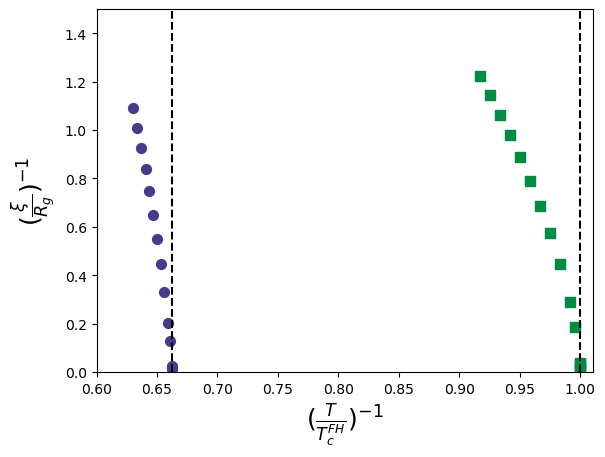

In [25]:
tξFH=import_hdf5('txiFH.hdf5')
tξAS=import_hdf5('txiAS.hdf5')

fig, ax = plt.subplots()
ax.scatter(1/tξFH[0:15:1,0],1/tξFH[0:15:1,1],marker="s",s=50,c='#008B45')
ax.scatter(1/tξAS[0:15:1,0],1/tξAS[0:15:1,1],marker="o",s=50,c='#473C8B')
ax.axvline(1, color="black", linestyle="--")
ax.axvline(280/422.85, color="black", linestyle="--")


ax.set_xlim([0.6,1.01])
ax.set_ylim([0,1.5])
ax.set_xlabel(r'$(\frac{T}{T_c^{FH}})^{-1}$',fontsize=18)  
ax.set_ylabel(r'$(\frac{ξ}{R_g})^{-1}$',fontsize=18)
ax.set_aspect(1/5)
#plt.savefig('APS_Tξ_reciprocal.eps', bbox_inches = "tight",format='eps')
plt.show()

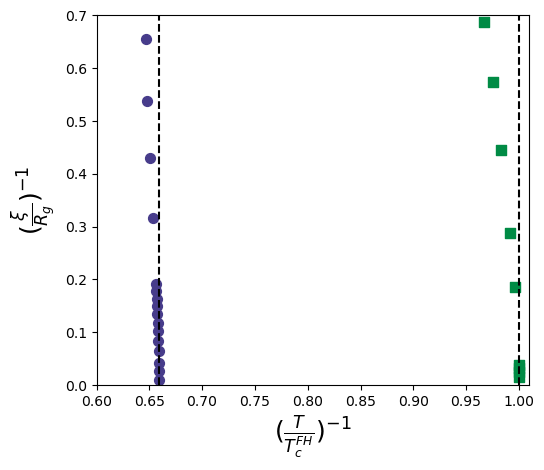

In [202]:
tξFH=import_hdf5('txiFH.hdf5')
tAS,ξAS=np.load("Tξ_θp_210_λ0_0.044.npy",allow_pickle=True)

fig, ax = plt.subplots()
ax.scatter(1/tξFH[0:15:1,0],1/tξFH[0:15:1,1],marker="s",s=50,c='#008B45')
ax.scatter(1/tAS,1/ξAS,marker="o",s=50,c='#473C8B')
ax.axvline(1, color="black", linestyle="--")
ax.axvline(280/424.97, color="black", linestyle="--")


ax.set_xlim([0.6,1.01])
ax.set_ylim([0,0.7])
ax.set_xlabel(r'$(\frac{T}{T_c^{FH}})^{-1}$',fontsize=18)  
ax.set_ylabel(r'$(\frac{ξ}{R_g})^{-1}$',fontsize=18)
ax.set_aspect(1/2)
#plt.savefig('APS_Tξ_reciprocal.eps', bbox_inches = "tight",format='eps')
plt.show()

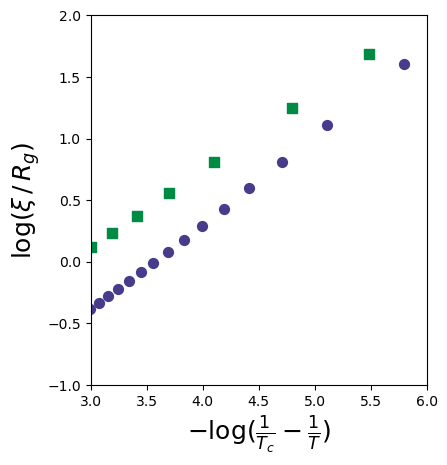

In [34]:
treciprocalξFH=import_hdf5('treciprocalxiFH.hdf5')
treciprocalξAS=import_hdf5('treciprocalxiAS.hdf5')
                           
fig, ax = plt.subplots()
ax.scatter(np.log(treciprocalξFH[:,0]),np.log(treciprocalξFH[:,1]),marker="s",s=50,c='#008B45')
ax.scatter(np.log(treciprocalξAS[:,0]),np.log(treciprocalξAS[:,1]),marker="o",s=50,c='#473C8B')


ax.set_xlim([3,6])
ax.set_ylim([-1,2])
ax.set_xlabel(r'$-\log(\frac{1}{T_c}-\frac{1}{T})$',fontsize=18)  
ax.set_ylabel(r'$\log(ξ\,/\,R_g)$',fontsize=18)
ax.set_aspect(1.1)
#plt.savefig('APS_logtξ_imporve.eps', bbox_inches = "tight",format='eps')
plt.show()

Text(0, 0.5, 'ν$_{app}$')

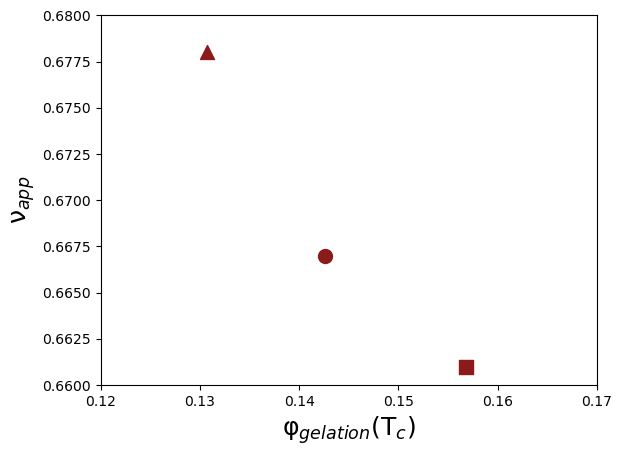

In [215]:
fig, ax = plt.subplots()

ax.scatter(0.1307,0.678,color='#8B1A1A',marker="^",s=100)
ax.scatter(0.1426,0.667,color='#8B1A1A',marker="o",s=100)
ax.scatter(0.1568,0.661,color='#8B1A1A',marker="s",s=100)


ax.set_xlim([0.12,0.17])
ax.set_ylim([0.66,0.68])
ax.set_xlabel(r'φ$_{gelation}$(T$_c$)',fontsize=18)  
ax.set_ylabel(r'ν$_{app}$',fontsize=18)